In [49]:
from logger import Logger
import utils
import pandas as pd
from importlib import reload
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns

import collections
import numpy as np

import flow_discretize

import countminsketch

reload(countminsketch)
reload(utils)

plt.grid(True)



<module 'utils' from '/Users/mihaivo/PycharmProjects/CyberBotnet3/utils.py'>

In [2]:
# load the data set
logger = Logger(show = True, html_output = True, config_file = "config.txt")

2019.06.25-15:41:50 Initialize the logger
2019.06.25-15:41:50 Create logs folder logs
2019.06.25-15:41:50 Create log file logs/2019-06-25_15_41_50_log0.html
2019.06.25-15:41:50 Create models folder models
2019.06.25-15:41:50 Create output folder output
2019.06.25-15:41:50 Create data folder data
2019.06.25-15:41:50 Read config file config.txt


In [3]:
df = utils.load_data("DATA_FILE2", logger)


[2019.06.25-15:41:50] Start loading data from capture20110818.pcap.netflow.labeled...
[2019.06.25-15:41:53] Line 100000: ['2011-08-18 10:25:45.327', '0.000', 'TCP', '209.85.148.99', '443', '147.32.84.170', '52538', 'A_', '0', '1', '66', '1', 'Background']
[2019.06.25-15:41:53] Line 200000: ['2011-08-18 10:31:52.352', '0.000', 'UDP', '147.32.80.9', '53', '147.32.86.202', '57773', 'INT', '0', '1', '235', '1', 'Background']
[2019.06.25-15:41:54] Line 300000: ['2011-08-18 10:38:00.055', '0.000', 'UDP', '180.214.210.177', '62384', '147.32.84.229', '13363', 'INT', '0', '1', '67', '1', 'Background']
[2019.06.25-15:41:55] Line 400000: ['2011-08-18 10:44:11.165', '1.942', 'TCP', '38.101.148.126', '54209', '147.32.84.36', '80', 'PA_', '0', '4', '585', '1', 'Background']
[2019.06.25-15:41:56] Line 500000: ['2011-08-18 10:50:29.484', '1.810', 'TCP', '147.32.84.59', '40142', '195.113.232.82', '80', 'SPA_', '0', '9', '1593', '1', 'Background']
[2019.06.25-15:41:56] Line 600000: ['2011-08-18 10:56:32

[2019.06.25-15:42:25] Line 4900000: ['2011-08-18 14:52:11.816', '0.000', 'UDP', '147.32.86.116', '19083', '24.147.125.100', '16828', 'INT', '0', '1', '61', '1', 'Background']
[2019.06.25-15:42:26] Line 5000000: ['2011-08-18 14:56:52.579', '0.000', 'UDP', '178.40.174.113', '20581', '147.32.84.229', '13363', 'INT', '0', '1', '170', '1', 'Background']
[2019.06.25-15:42:26] Line 5100000: ['2011-08-18 15:01:40.677', '1.060', 'TCP', '98.163.103.118', '3010', '147.32.84.229', '80', 'FRPA_', '0', '10', '716', '1', 'Background']
[2019.06.25-15:43:02] Finished loading file [36.12s]


In [4]:
df.set_index('date', inplace=True)


In [5]:
# drop background traffic
df = df[df.label != "Background"]
infected_host_ip = logger.config_dict['INFECTED_HOST2']

In [6]:
# Apply the discretization
flow_discretize.discretize(df, "flags", "bytes", percentiles = [20, 40, 60, 80])

390

In [7]:
# We care only about the infected host initiated connections
df_host = df[df['ip_src'] == infected_host_ip]

In [8]:
df_host.head()

,duration,protocol,ip_src,port_src,ip_dest,port_dest,flags,tos,packets,bytes,flows,label,flags_bytes_comb
date,,,,,,,,,,,,,
2011-08-18 10:37:58.448,0.000,UDP,147.32.84.165,1025,147.32.80.9,53,INT,0,1,64,1,Botnet,25
2011-08-18 10:38:00.695,0.000,UDP,147.32.84.165,1025,147.32.80.9,53,INT,0,1,87,1,Botnet,25
2011-08-18 10:38:00.706,0.043,TCP,147.32.84.165,1027,74.125.232.206,80,SRPA_,0,4,629,1,Botnet,75
2011-08-18 10:38:03.255,0.000,UDP,147.32.84.165,1025,147.32.80.9,53,INT,0,1,76,1,Botnet,25
2011-08-18 10:38:03.267,2.990,UDP,147.32.84.165,123,65.55.56.40,123,INT,0,2,180,1,Botnet,25


In [9]:
df_host.tail()

,duration,protocol,ip_src,port_src,ip_dest,port_dest,flags,tos,packets,bytes,flows,label,flags_bytes_comb
date,,,,,,,,,,,,,
2011-08-18 15:04:54.003,0.00,ICMP,147.32.84.165,None,147.32.96.69,None,UNK,0,1,1066,1,Botnet,185
2011-08-18 15:04:54.171,0.00,ICMP,147.32.84.165,None,147.32.96.69,None,UNK,0,1,1066,1,Botnet,185
2011-08-18 15:04:54.341,0.00,ICMP,147.32.84.165,None,147.32.96.69,None,ECO,0,1,1066,1,Botnet,85
2011-08-18 15:04:54.349,0.00,UDP,147.32.84.165,1025,147.32.80.9,53,INT,0,1,76,1,Botnet,25
2011-08-18 15:04:54.494,3.76,TCP,147.32.84.165,1040,140.211.167.98,6667,SPA_,0,3,224,1,Botnet,15


In [10]:
# 3ngrams algorithm

# max size is nr_flags(78) * buckets(5)
max_size = 78 * 5

def extract_3_ngrams(df):
    ngrams = 3
    results = []
    
    
    # maps the three values in a max_size^3 space, these are now our states
    def ngrams3(e):
        results.append(e[0]*(max_size**2) + e[1]*max_size + e[2])
        return 0
    
    #applies the ngram mapping on sets of 3 elements
    def fn(e):
        e.rolling(window=3, min_periods=3).apply(ngrams3)
        return 0
    
    # applies a rolling window of 2 seconds and applies the ngrams
    df['flags_bytes_comb'].rolling(window='2s',min_periods=ngrams).apply(fn, False)
    
    fingerprint = collections.Counter(results)
    
    # now we need to normalize to get the distribution, so this fingerprint can be applied to everyone
    
    total = len (results)
    
    for k in fingerprint.keys():
        fingerprint[k] /= total
    
    top =  sorted(fingerprint.items(), key=itemgetter(1), reverse=True)
    
    return results, fingerprint, top

In [11]:
infected_ngrams, infected_fingerprint, infected_top = extract_3_ngrams(df_host)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


In [12]:

len(set(infected_ngrams))

1160

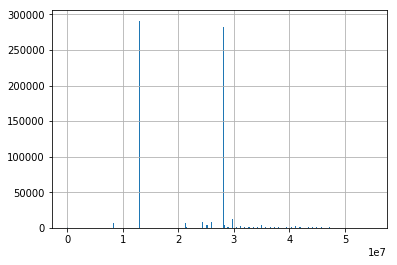

In [13]:
# We can notice some buckets which stand out
plt.hist(infected_ngrams, bins=max_size)
plt.grid(True)

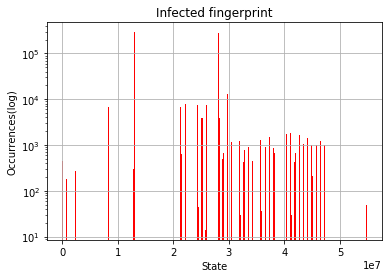

In [14]:
plt.hist(infected_ngrams, bins=max_size, log=True, color='red')
plt.title("Infected fingerprint")
plt.xlabel("State")
plt.ylabel("Occurrences(log)")
plt.grid(True)
plt.savefig("./output/infected_fingerprint.eps", format='eps', dpi=1000)


In [15]:
infected_top[:15]

[(12961735.0, 0.08578004127752453),
 (13000735.0, 0.08529154107707612),
 (28171835.0, 0.0847466183610744),
 (28171735.0, 0.0844674753893896),
 (12961835.0, 0.08340584121516281),
 (28210735.0, 0.0814117507312655),
 (13000835.0, 0.08119051507817487),
 (28210835.0, 0.07891282721347014),
 (8387005.0, 0.010147143981350875),
 (29731735.0, 0.004614767851044559),
 (13000845.0, 0.004135176468841408),
 (28214735.0, 0.004118843635391765),
 (13004735.0, 0.004044603483347934),
 (12961845.0, 0.003928788846159557),
 (29692735.0, 0.003869396724524492)]

In [16]:
# now we have the fingerprint, lets compare to the other hosts, extract them first
hosts = df['ip_src'].value_counts()
hosts = hosts[hosts != infected_host_ip]

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [17]:
hosts.head()

147.32.96.69     100394
147.32.84.59      90560
147.32.80.13      36949
147.32.84.205     24572
147.32.84.206     23169
Name: ip_src, dtype: int64

In [18]:
normal_ngrams0, normal_fingerprint0, normal_top0 = extract_3_ngrams(df[df['ip_src'] == hosts.index[2]])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


In [19]:
normal_ngrams1, normal_fingerprint1, normal_top1 = extract_3_ngrams(df[df['ip_src'] == hosts.index[1]])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


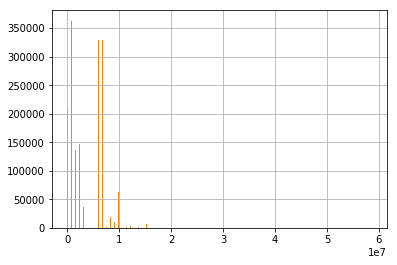

In [20]:
plt.hist(normal_ngrams0, bins=max_size)
plt.hist(normal_ngrams1, bins=max_size)
plt.grid(True)


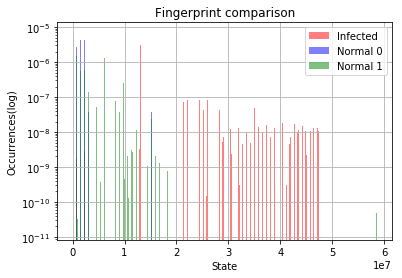

In [21]:
plt.hist(infected_ngrams, max_size, alpha=0.5, label='Infected', density=True, log=True, color='red')
plt.hist(normal_ngrams0, max_size, alpha=0.5, label='Normal 0', density=True, log=True, color='blue')
plt.hist(normal_ngrams1, max_size, alpha=0.5, label='Normal 1', density=True, log=True, color='green')
plt.legend(loc='upper right')
plt.title("Fingerprint comparison")
plt.xlabel("State")
plt.ylabel("Occurrences(log)")
plt.grid(True)
plt.savefig("./output/comparison_fingerprint.eps", format='eps', dpi=1000)
plt.show()

In [22]:
infected_fingerprint

Counter({3808365.0: 0.00010393621286136394,
         2287405.0: 0.00010245140982048732,
         2303005.0: 0.00010096660677961068,
         8387005.0: 0.010147143981350875,
         28210795.0: 0.001440258949650329,
         28195240.0: 0.0001232386523927601,
         22128795.0: 0.00012175384935188347,
         28975210.0: 0.00012026904631100685,
         29721900.0: 0.00011878424327013022,
         24336140.0: 0.0001172994402292536,
         54685.0: 0.00011581463718837696,
         21327350.0: 0.00011432983414750034,
         13006670.0: 0.0001128450311066237,
         30486385.0: 0.00011136022806574708,
         25890335.0: 0.001795126876419843,
         13000735.0: 0.08529154107707612,
         28171860.0: 0.00027617336560305277,
         13010565.0: 0.0001544195162511693,
         32005540.0: 0.00010542101590224056,
         25170685.0: 0.00010393621286136394,
         28932335.0: 0.0005389835038382159,
         28171735.0: 0.0844674753893896,
         12961835.0: 0.083405841215

In [23]:

def sparse_mse(distribution1, distribution2):
    mse = 0
    for k in distribution1.keys():
        e = distribution1[k]
        
        if k in distribution2:
            e -= distribution2[k]
            
        mse += e**2
        
    # we still have elements that were missing from d1
    for k in distribution2.keys(): 
        if k not in distribution1:
            mse += distribution2[k]**2
            
    return mse
            
        

In [ ]:
# should be 0
sparse_mse(infected_fingerprint, infected_fingerprint)

In [28]:
ranks = [
    (hosts.index[0], sparse_mse(infected_fingerprint, normal_fingerprint0)),
    (hosts.index[1], sparse_mse(infected_fingerprint, normal_fingerprint1))
]

In [29]:
# calculate all the MSEs
for host in hosts.index:
    normal_ngrams, normal_fingerprint, normal_top = extract_3_ngrams(df[df['ip_src'] == host])
       
    ranks.append( (host, sparse_mse(infected_fingerprint, normal_fingerprint)))



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


In [30]:
ranks.sort(key=itemgetter(1))
ranks

[('147.32.84.165', 0.0),
 ('147.32.84.192', 6.495304925192936e-05),
 ('147.32.84.207', 6.530042056691666e-05),
 ('147.32.84.193', 6.767790849446305e-05),
 ('147.32.84.205', 9.563718527634412e-05),
 ('147.32.84.209', 0.00010708157534438475),
 ('147.32.84.208', 0.0001083578786027062),
 ('147.32.84.204', 0.00012052790895106666),
 ('147.32.84.206', 0.00014594682056543276),
 ('147.32.84.191', 0.0002091040368231673),
 ('66.249.66.211', 0.05585262508127887),
 ('74.125.39.125', 0.05585262508127887),
 ('74.125.232.216', 0.05585262508127887),
 ('147.32.85.36', 0.05585262508127887),
 ('205.188.10.203', 0.05585262508127887),
 ('64.12.73.133', 0.05585262508127887),
 ('205.188.17.129', 0.05585262508127887),
 ('147.32.85.89', 0.05585262508127887),
 ('213.232.93.3', 0.05585262508127887),
 ('213.179.58.83', 0.05585262508127887),
 ('147.32.85.42', 0.05585262508127887),
 ('89.16.176.16', 0.05585262508127887),
 ('38.101.148.126', 0.05585262508127887),
 ('38.229.70.20', 0.05585262508127887),
 ('78.40.125.4

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


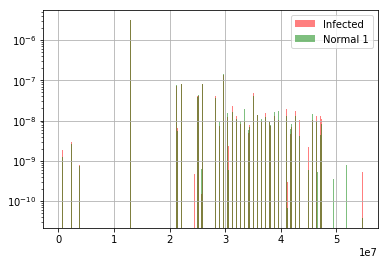

In [31]:
normal_ngrams_infected_prob_1, normal_fingerprint_infected_prob_1, normal_top_infected_prob_1 = extract_3_ngrams(df[df['ip_src'] ==ranks[1][0]])
plt.hist(infected_ngrams, max_size, alpha=0.5, label='Infected', density=True, log=True, color='red')
plt.hist(normal_ngrams_infected_prob_1, max_size, alpha=0.5, label='Normal 1', density=True, log=True, color='green')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [32]:
infected_hosts = logger.config_dict['INFECTED_HOSTS']

In [33]:
top = [e[0] for e in ranks[:len(infected_hosts)]]
counts = 0
for infect in infected_hosts:
    if infect in top:
        counts += 1
        
print("Got %d out of %d"%(counts, len(infected_hosts)))


Got 10 out of 10


In [37]:
toplot = ranks[:len(infected_hosts)*2]

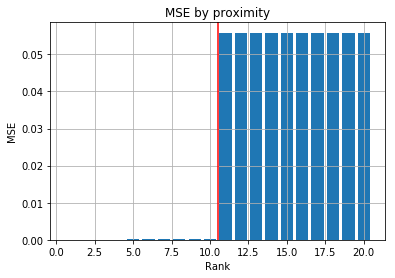

In [67]:
x = []
y = []

for ip, mse in toplot:
    x.append(ip)
    y.append(mse)

x = np.array(range(len(x)))
y = np.array(y)
plt.bar(x+1,y)
plt.axvline(x=10.5, color='red')

plt.title("MSE by proximity")
plt.xlabel("Rank")
plt.ylabel("MSE")
plt.grid(True)
plt.savefig("./output/mse.eps", format='eps', dpi=1000)


In [70]:
# the least alike infected
ranks[len(infected_hosts) - 1]

('147.32.84.191', 0.0002091040368231673)

In [71]:
# the most alike non-infected
ranks[len(infected_hosts)]

('66.249.66.211', 0.05585262508127887)